# 1. Defining the problem

1.Creating Multiple Linear Regression model for Prediction of the Gross Domestic Product(GDP) of India

2.Checking whether our model satisfy all the assumption of Multiple Linear Regression model

3.To predict the Gross Domestic Product(GDP) of India using the formed Multiple Linear Regression model

4.Checking whether Gross Domestic Product(GDP) follow Stationary or non Stationary Time series model

5.Creating a Auto Regrssive Integrated Moving Average model and estimating there lags

6.To predict the Gross Domestic Product(GDP) of India using the formed ARIMA(p.d.q) model

# 2. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import scipy as sp
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from statsmodels.graphics import tsaplots
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import shapiro
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd
from sklearn.metrics import mean_squared_error
from math import sqrt

# 3. Performing Exploratory Data Analysis

>3.1 Importing Dataset

In [2]:
os.chdir("E:\Priyanka")
#Renaming the AQI dataset as AQI
GDP=pd.read_excel("gdp.xlsx")

>3.2 Exploring Dataset

In [3]:
#Searching for null values in columns
GDP.isnull().sum()

Year                         0
Gdp                          0
Per Capita                   0
Growth                       0
export                       0
import                       0
Consumption expenditure      0
Inflation Rate               0
Manufacturing Output         0
Population                   0
Life Expectancy              0
Fertility Rate               0
Unemployement               31
Foreign investment           0
Crop_production              0
Net migration                0
India Consumer Spending      0
dtype: int64

In [4]:
GDP.columns

Index(['Year', 'Gdp', 'Per Capita ', 'Growth ', 'export', 'import',
       'Consumption expenditure ', 'Inflation Rate ', 'Manufacturing Output',
       'Population', 'Life Expectancy ', 'Fertility Rate', 'Unemployement',
       'Foreign investment', 'Crop_production ', 'Net migration',
       'India Consumer Spending '],
      dtype='object')

> Variables Meaning and there units


1.GDP or Gross domestic product measures the monetary value of final goods and services—that is, those that are bought by the final user—produced in a country in a given period of time and its unit is US billion dollar.

2.Per Capita a measure of the total economic output of a country (GDP) divided by the total population of the country and its unit is US dollar.

3.Growth he annual average rate of change of the gross domestic product (GDP) at market prices based on constant local currency, for a given national economy, during a specified period of time.

4.Export measures the portion of total U.S. production of goods and services—gross domestic product (GDP)—that is provided to the rest of the world and its unit is billion US dollar.

5.Imports of goods and services represent the value of all goods and other market services received from the rest of the world and its unit is billion US dollar.

6.Final consumption expenditure consists of expenditure incurred by resident institutional units (Households, NPISHs, sector of general government) on goods or services that are used for the direct satisfaction of individual needs or wants or the collective needs of members of the community and unit is billion US dollar.

7.Inflation rate is rate at which prices increase over time, resulting in a fall in the purchasing value of money.

8.Manufacturing output the cost of units of goods or services produced by the businesses in that industry for sale to consumers or to businesses in other industries and its unit is billion US dollar.

9.Population is the complete set group of individuals, whether that group comprises a nation or a group of people with a common characteristic.

10.Life expectancy is the average period that a person may expect to live in years.

11.Fertility Rate  is the ratio between the number of live births in a year and the whole female population of childbearing age.

12.Unemployement rate is the percentage of the labor force that is looking for a job.

13.Foreign investment involves capital flows from one nation to another in exchange for significant ownership stakes in domestic companies or other assets and its unit is a ratio of GDP.

14.Crop Production the process of growing crops for domestic and commercial purposes and index (2014-2016 = 100).

15.Net migration is the net total of migrants during the period, that is, the number of immigrants minus the number of emigrants.

16.India Consumer Spending is the total amount of money the public spends on goods and services for personal or non-business use and unit is US dollar.

In [5]:
GDP.head()

,Year,Gdp,Per Capita,Growth,export,import,Consumption expenditure,Inflation Rate,Manufacturing Output,Population,Life Expectancy,Fertility Rate,Unemployement,Foreign investment,Crop_production,Net migration,India Consumer Spending
0,2021,3173.40,2256.590409,8.95,679.68,758.87,2245.422294,5.13,443.91,1407563842,69.96,2.179,5.98,1.408159,117.13,-301970,1891.90
1,2020,2667.69,1910.421473,-6.60,499.10,509.43,1943.557071,6.62,365.03,1396387127,69.73,2.200,8.00,2.412665,115.29,-34772,1621.12
2,2019,2831.55,2047.232704,3.74,529.24,602.31,2036.472955,3.73,381.51,1383112050,69.50,2.220,5.27,1.787382,112.91,-593495,1726.04
3,2018,2702.93,1974.377788,6.45,538.64,640.30,1895.065687,3.94,402.24,1369003306,69.27,2.240,5.33,1.558215,111.82,-561563,1602.52
4,2017,2651.47,1957.968841,6.80,498.26,582.02,1842.570824,3.33,398.20,1354195680,68.97,2.271,5.36,1.507317,107.48,-219656,1557.08


>3.3 Data Cleaning

In [6]:
GDP_INDIA=GDP.drop(['Unemployement'],axis=1)
GDP_INDIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      62 non-null     int64  
 1   Gdp                       62 non-null     float64
 2   Per Capita                62 non-null     float64
 3   Growth                    62 non-null     float64
 4   export                    62 non-null     float64
 5   import                    62 non-null     float64
 6   Consumption expenditure   62 non-null     float64
 7   Inflation Rate            62 non-null     float64
 8   Manufacturing Output      62 non-null     float64
 9   Population                62 non-null     int64  
 10  Life Expectancy           62 non-null     float64
 11  Fertility Rate            62 non-null     float64
 12  Foreign investment        62 non-null     float64
 13  Crop_production           62 non-null     float64
 14  Net migratio

> Checking for outlier and dropping them

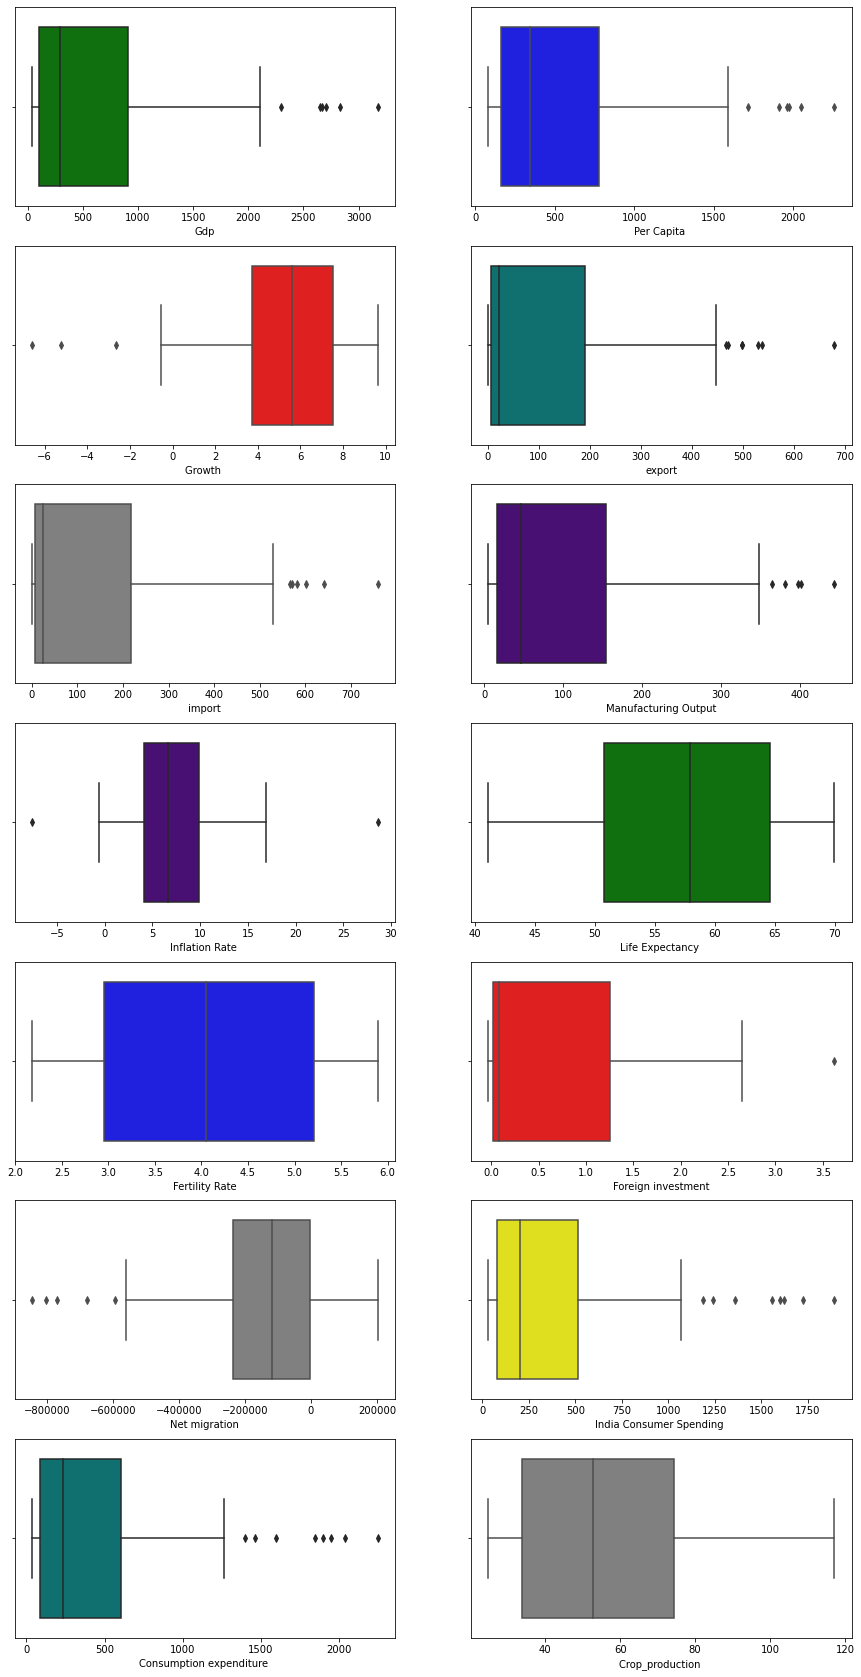

In [7]:
fig, axes = plt.subplots(7,2 , figsize=(15, 30))
sns.boxplot(data=GDP_INDIA,x="Gdp",color="green",ax=axes[0,0])
sns.boxplot(data=GDP_INDIA,x="Per Capita ",color="blue",ax=axes[0,1])
sns.boxplot(data=GDP_INDIA,x="Growth ",color="red",ax=axes[1,0])
sns.boxplot(data=GDP_INDIA,x="export",color="teal",ax=axes[1,1])
sns.boxplot(data=GDP_INDIA,x="import",color="gray",ax=axes[2,0])
sns.boxplot(data=GDP_INDIA,x="Manufacturing Output",color="indigo",ax=axes[2,1])
sns.boxplot(data=GDP_INDIA,x="Inflation Rate ",color="indigo",ax=axes[3,0])
sns.boxplot(data=GDP_INDIA,x="Life Expectancy ",color="green",ax=axes[3,1])
sns.boxplot(data=GDP_INDIA,x="Fertility Rate",color="blue",ax=axes[4,0])
sns.boxplot(data=GDP_INDIA,x="Foreign investment",color="red",ax=axes[4,1])
sns.boxplot(data=GDP_INDIA,x="Net migration",color="gray",ax=axes[5,0])
sns.boxplot(data=GDP_INDIA,x="India Consumer Spending ",color="yellow",ax=axes[5,1])
sns.boxplot(data=GDP_INDIA,x="Consumption expenditure ",color="teal",ax=axes[6,0])
sns.boxplot(data=GDP_INDIA,x="Crop_production ",color="gray",ax=axes[6,1])
plt.show()

In [8]:
#Checking for outliers in possible variables using Z-score
z=np.abs(stats.zscore(GDP_INDIA[['Gdp', 'Per Capita ', 'Growth ', 'export', 'import',
       'Consumption expenditure ', 'Inflation Rate ', 'Manufacturing Output',
       'Population', 'Life Expectancy ', 'Fertility Rate',
       'Foreign investment', 'Crop_production ', 'Net migration',
       'India Consumer Spending ']]))
outliers=np.where(z>3)
print(np.unique(outliers))

[ 1  2  6 11 13 42 45 47]


In [9]:
#Dropping the outliers
GDP_INDIA_clean=GDP_INDIA.drop([1,2,6,11,13,42,45,47],axis=0)
GDP_INDIA_clean.shape

(54, 16)

In [10]:
#Checking for duplicate rows
duplicates = GDP_INDIA_clean[GDP_INDIA_clean.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  0


,Year,Gdp,Per Capita,Growth,export,import,Consumption expenditure,Inflation Rate,Manufacturing Output,Population,Life Expectancy,Fertility Rate,Foreign investment,Crop_production,Net migration,India Consumer Spending


In [11]:
#Saving the datadet wint no null values in new excel workbook as BHU_AQI
GDP_INDIA_clean.to_excel(r'E:\\Priyanka\GDP_INDIA_clean.xlsx',index=False)
GDP_INDIA_Clean=pd.read_excel("GDP_INDIA_clean.xlsx")
GDP_INDIA_Clean.columns,GDP_INDIA_Clean.shape

(Index(['Year', 'Gdp', 'Per Capita ', 'Growth ', 'export', 'import',
        'Consumption expenditure ', 'Inflation Rate ', 'Manufacturing Output',
        'Population', 'Life Expectancy ', 'Fertility Rate',
        'Foreign investment', 'Crop_production ', 'Net migration',
        'India Consumer Spending '],
       dtype='object'),
 (54, 16))

# 4. Visualization of Data

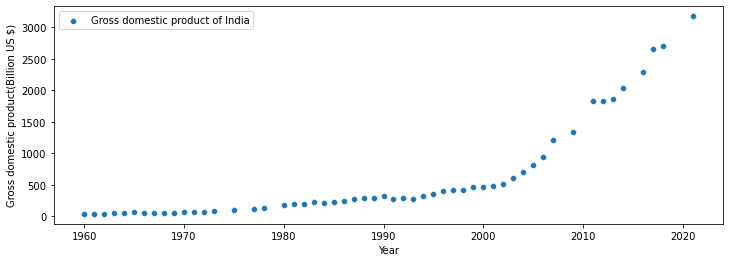

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean.Gdp,x=GDP_INDIA_clean.Year)
plt.ylabel("Gross domestic product(Billion US $)")
plt.xlabel("Year")
plt.legend(["Gross domestic product of India"],loc=0)

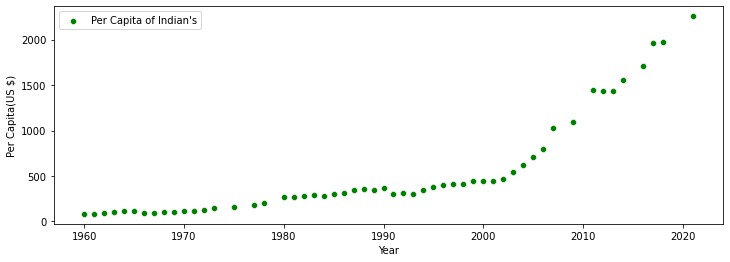

In [13]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Per Capita '],x=GDP_INDIA_clean.Year,color='green')
plt.ylabel("Per Capita(US $)")
plt.xlabel("Year")
plt.legend(["Per Capita of Indian's"],loc=0)

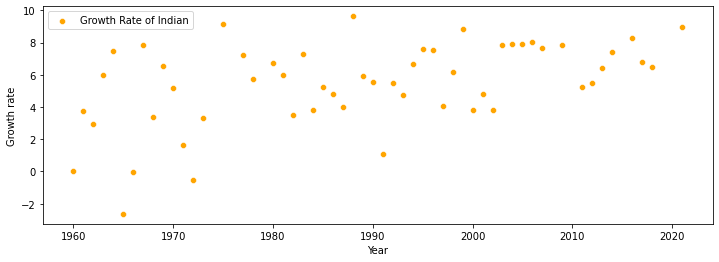

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Growth '],x=GDP_INDIA_clean.Year,color='orange')
plt.ylabel("Growth rate")
plt.xlabel("Year")
plt.legend(["Growth Rate of Indian"],loc=0)

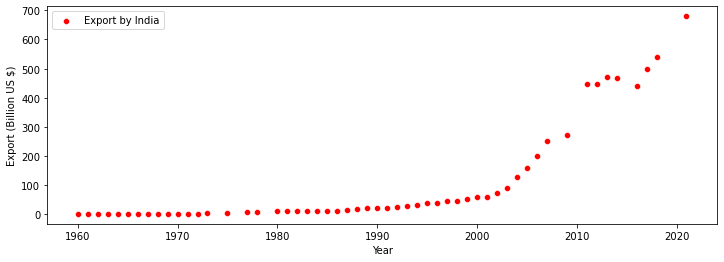

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['export'],x=GDP_INDIA_clean.Year,color='red')
plt.ylabel("Export (Billion US $)")
plt.xlabel("Year")
plt.legend(["Export by India"],loc=0)

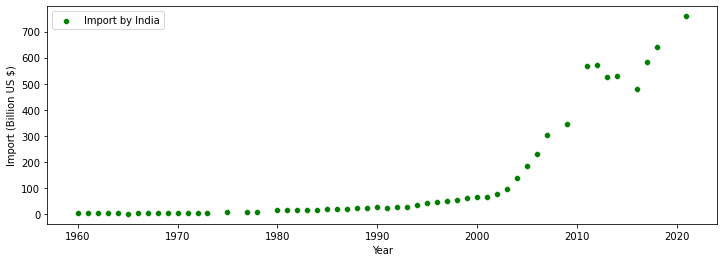

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['import'],x=GDP_INDIA_clean.Year,color='green')
plt.ylabel("Import (Billion US $)")
plt.xlabel("Year")
plt.legend(["Import by India"],loc=0)

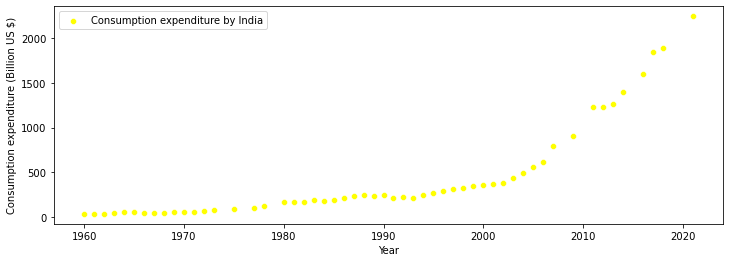

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Consumption expenditure '],x=GDP_INDIA_clean.Year,color='yellow')
plt.ylabel("Consumption expenditure (Billion US $)")
plt.xlabel("Year")
plt.legend(["Consumption expenditure by India"],loc=0)

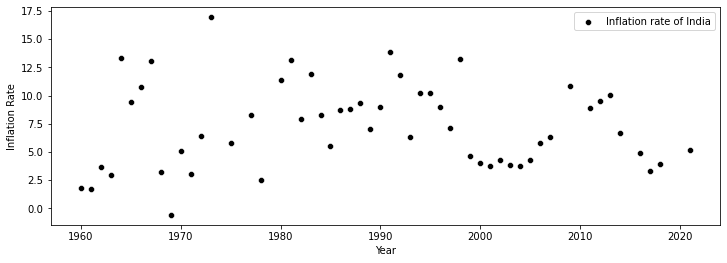

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Inflation Rate '],x=GDP_INDIA_clean.Year,color='black')
plt.ylabel("Inflation Rate")
plt.xlabel("Year")
plt.legend(["Inflation rate of India"],loc=0)

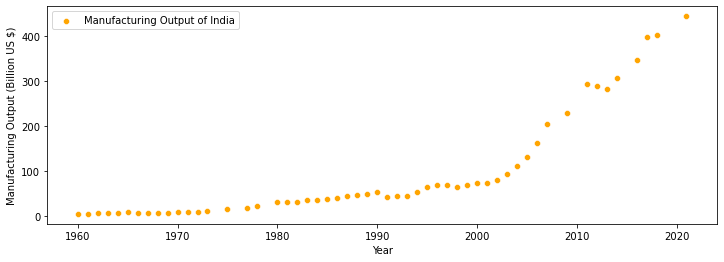

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Manufacturing Output'],x=GDP_INDIA_clean.Year,color='orange')
plt.ylabel("Manufacturing Output (Billion US $)")
plt.xlabel("Year")
plt.legend(["Manufacturing Output of India"],loc=0)

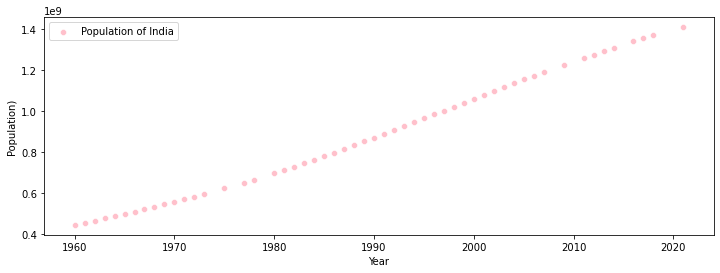

In [20]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Population'],x=GDP_INDIA_clean.Year,color='pink')
plt.ylabel("Population)")
plt.xlabel("Year")
plt.legend(["Population of India"],loc=0)

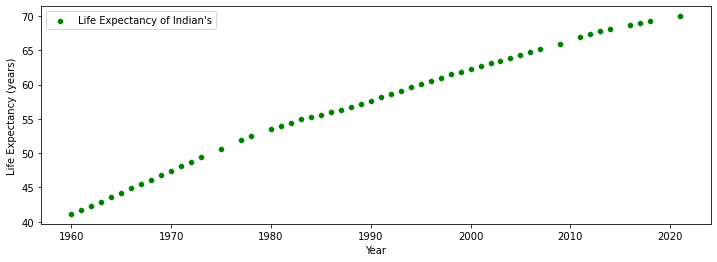

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Life Expectancy '],x=GDP_INDIA_clean.Year,color='green')
plt.ylabel("Life Expectancy (years)")
plt.xlabel("Year")
plt.legend(["Life Expectancy of Indian's"],loc=0)

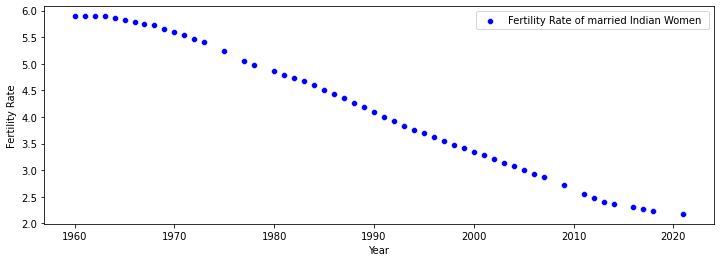

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Fertility Rate'],x=GDP_INDIA_clean.Year,color='blue')
plt.ylabel("Fertility Rate")
plt.xlabel("Year")
plt.legend(["Fertility Rate of married Indian Women "],loc=0)

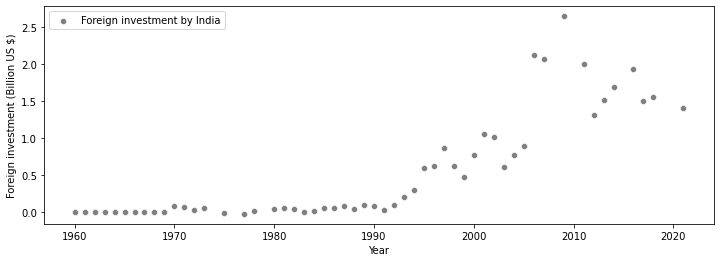

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Foreign investment'],x=GDP_INDIA_clean.Year,color='gray')
plt.ylabel("Foreign investment (Billion US $)")
plt.xlabel("Year")
plt.legend(["Foreign investment by India"],loc=0)

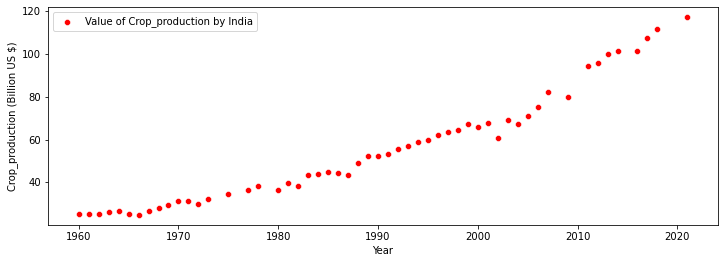

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Crop_production '],x=GDP_INDIA_clean.Year,color='red')
plt.ylabel("Crop_production (Billion US $)")
plt.xlabel("Year")
plt.legend(["Value of Crop_production by India"],loc=0)

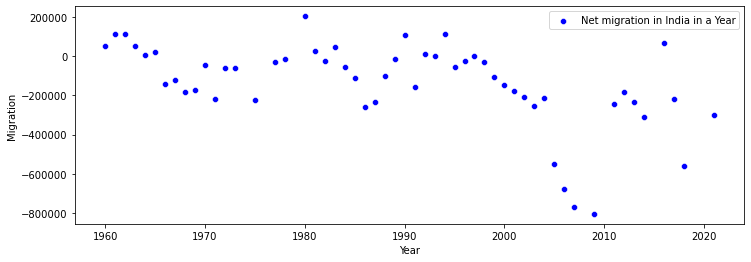

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['Net migration'],x=GDP_INDIA_clean.Year,color='blue')
plt.ylabel("Migration")
plt.xlabel("Year")
plt.legend(["Net migration in India in a Year"],loc=0)

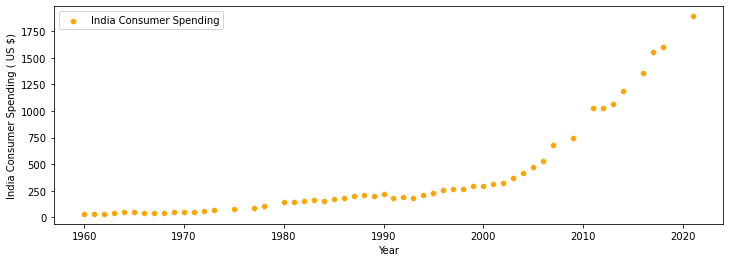

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=GDP_INDIA_clean['India Consumer Spending '],x=GDP_INDIA_clean.Year,color='orange')
plt.ylabel("India Consumer Spending ( US $)")
plt.xlabel("Year")
plt.legend(["India Consumer Spending"],loc=0)

# 5. Deducing Predictor and Target Variables

>5.1 Checking for Correlated variables and droping them.

In [27]:
#Defining the Predictor variable
X=GDP_INDIA_clean.drop(["Year","Gdp","Growth ","Foreign investment"],axis=1)
#Defining the Target variable
Y=GDP_INDIA_clean.Gdp
X.head()

,Per Capita,export,import,Consumption expenditure,Inflation Rate,Manufacturing Output,Population,Life Expectancy,Fertility Rate,Crop_production,Net migration,India Consumer Spending
0,2256.590409,679.68,758.87,2245.422294,5.13,443.91,1407563842,69.96,2.179,117.13,-301970,1891.90
3,1974.377788,538.64,640.30,1895.065687,3.94,402.24,1369003306,69.27,2.240,111.82,-561563,1602.52
4,1957.968841,498.26,582.02,1842.570824,3.33,398.20,1354195680,68.97,2.271,107.48,-219656,1557.08
5,1714.280355,439.64,480.17,1597.267269,4.95,347.94,1338636340,68.67,2.302,101.19,68119,1360.71
7,1559.864518,468.35,529.24,1398.200610,6.67,307.21,1307246509,68.07,2.365,101.33,-310694,1185.30


We are droping the variable Foreign investment because its value is the ratio of GDP of that year.

Checking for strongly correlated variables (correlation>0.8 or <-0.8) and droping those variables from our prediction variable set.

<AxesSubplot:>

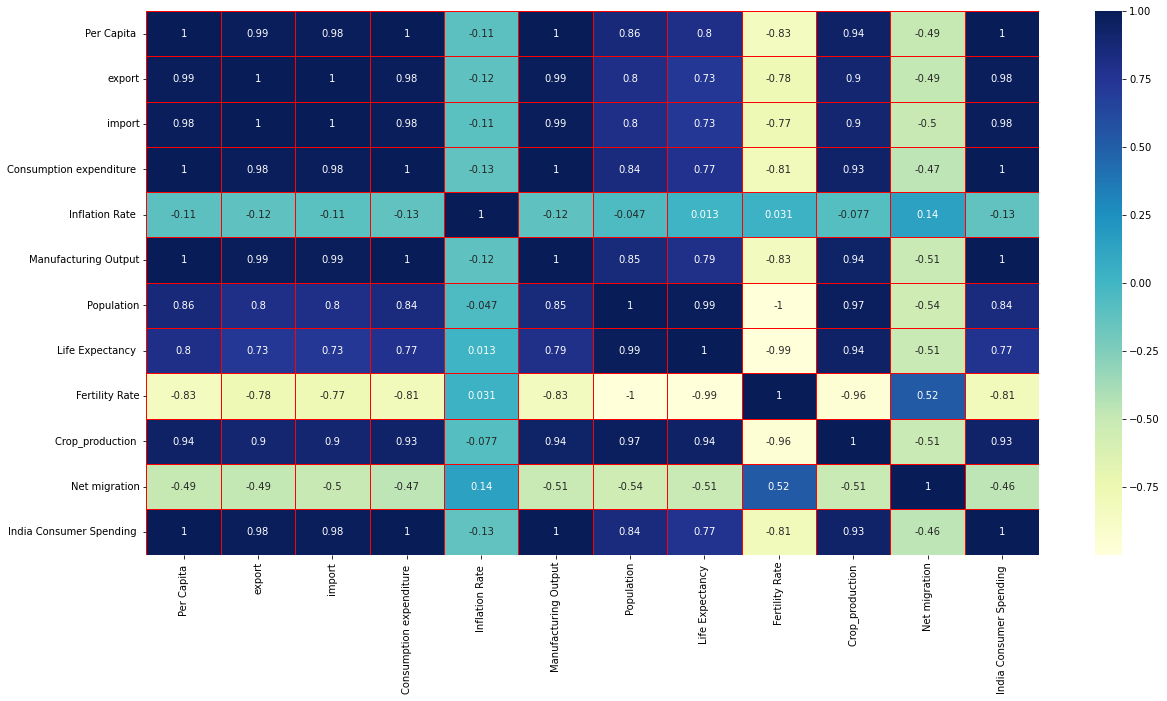

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), cmap="YlGnBu",annot=True,linewidths=1,linecolor="red")

Its hard to figure our the dropping variables because there are many highly correlated variable

>5.2 Checking for multicollinearity and dropping the correlated variables using Variance inflation factor

In [29]:
Int=X.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X.shape[1])]
VIF

,feature,VIF
0,Per Capita,3.648295e+03
1,export,1.242502e+03
2,import,1.406266e+03
3,Consumption expenditure,6.670204e+04
4,Inflation Rate,5.589764e+00
5,Manufacturing Output,1.312398e+03
6,Population,-2.704080e-08
7,Life Expectancy,2.837311e+03
8,Fertility Rate,1.814498e+02
9,Crop_production,8.553346e+02


Removing the variable Population because of its negativ VIF 

In [30]:
X1=X.drop(["Population"],axis=1)

Int=X1.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X1.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X1.shape[1])]
VIF

,feature,VIF
0,Per Capita,3629.603380
1,export,1080.116306
2,import,1155.303970
3,Consumption expenditure,52675.313619
4,Inflation Rate,5.420775
5,Manufacturing Output,1286.863368
6,Life Expectancy,1062.735076
7,Fertility Rate,100.253060
8,Crop_production,643.568635
9,Net migration,0.000657


Dropping the variable with maximum VIF that is variable ("India Consumer Spending")

Continuing the process of eliminating or dropping the variables with maximum VIF untill the VIF of all variables is less than 20

In [31]:
X2=X.drop(["India Consumer Spending ","Population"],axis=1)

Int=X2.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X2.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X2.shape[1])]
VIF

,feature,VIF
0,Per Capita,3159.128733
1,export,664.052015
2,import,593.221506
3,Consumption expenditure,867.219308
4,Inflation Rate,5.416674
5,Manufacturing Output,1285.409737
6,Life Expectancy,1062.473273
7,Fertility Rate,99.061497
8,Crop_production,619.325261
9,Net migration,0.000586


In [32]:
X3=X.drop(["India Consumer Spending ","Population","Per Capita "],axis=1)
Int=X3.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X3.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X3.shape[1])]
VIF

,feature,VIF
0,export,663.185198
1,import,587.373044
2,Consumption expenditure,383.116968
3,Inflation Rate,5.237513
4,Manufacturing Output,590.934381
5,Life Expectancy,776.767436
6,Fertility Rate,83.247332
7,Crop_production,572.534461
8,Net migration,0.000566


In [33]:
X4=X.drop(["India Consumer Spending ","Population","Per Capita ","Life Expectancy "],axis=1)
Int=X4.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X4.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X4.shape[1])]
VIF

,feature,VIF
0,export,630.805193
1,import,585.652982
2,Consumption expenditure,366.608795
3,Inflation Rate,4.722049
4,Manufacturing Output,577.341418
5,Fertility Rate,7.729041
6,Crop_production,36.829810
7,Net migration,0.000545


In [34]:
X5=X.drop(["India Consumer Spending ","Population","Manufacturing Output","Life Expectancy ","Per Capita "],axis=1)
Int=X5.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X5.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X5.shape[1])]
VIF

,feature,VIF
0,export,563.928147
1,import,426.221708
2,Consumption expenditure,82.890428
3,Inflation Rate,4.720912
4,Fertility Rate,5.811361
5,Crop_production,25.097832
6,Net migration,0.000464


In [35]:
X6=X.drop(["India Consumer Spending ","Population","Manufacturing Output","Life Expectancy ","Per Capita ","export"],axis=1)
Int=X6.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X6.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X6.shape[1])]
VIF

,feature,VIF
0,import,37.342635
1,Consumption expenditure,59.748149
2,Inflation Rate,4.630382
3,Fertility Rate,5.811243
4,Crop_production,24.740494
5,Net migration,0.000458


In [36]:
X_FINAL=X.drop(["India Consumer Spending ","Population","Manufacturing Output","Life Expectancy ","Per Capita ","export","Consumption expenditure "],axis=1)
Int=X_FINAL.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X_FINAL.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X_FINAL.shape[1])]
VIF

,feature,VIF
0,import,6.121645
1,Inflation Rate,4.354339
2,Fertility Rate,5.763630
3,Crop_production,14.782436
4,Net migration,0.000421


We can use the variables with VIF less than 20 in building a regression model

# 6. Model Building

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_FINAL,Y, test_size=0.15, random_state=0)

In [38]:
x_train_sm=sm.add_constant(x_train)

In [39]:
x_train_sm.head()

,const,import,Inflation Rate,Fertility Rate,Crop_production,Net migration
35,1.0,17.49,8.73,4.432,44.40,-258917
7,1.0,529.24,6.67,2.365,101.33,-310694
15,1.0,229.96,5.80,2.934,75.26,-678231
33,1.0,22.11,9.38,4.266,49.03,-103742
27,1.0,33.35,10.25,3.763,58.83,110095


# Method 1:Fitting a Linear regression model using ordinary least square method

In [40]:
lr=sm.OLS(y_train,x_train_sm).fit()
lr

In [41]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gdp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     432.4
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.84e-33
Time:                        23:28:13   Log-Likelihood:                -272.38
No. Observations:                  45   AIC:                             556.8
Df Residuals:                      39   BIC:                             567.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1836.5613    738.321  

In [42]:
#Checking wether our model is significant or not
4.84e-33<0.05

True

# Method 2: Using Multiple Linear Regression

In [43]:
#Other way to fit model 
x_train, x_test, y_train, y_test = train_test_split(X_FINAL,Y, test_size=0.15, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
train_accuracy=Lin_reg.score(x_train,y_train)
test_accuracy=Lin_reg.score(x_test,y_test)
print(Lin_reg.score(x_train, y_train))
print(Lin_reg.score(x_test, y_test))


-1836.561284335959
[ 2.25390360e+00 -4.42552335e+00  2.31693801e+02  2.20008796e+01
  1.37242145e-05]
0.9822827480860098
0.9819560676880839


As we can see both provide same regression equation as MLR also uses principal of OLS

   GDP= -1836.5613 + 2.2539* IMPORT -4.4255* INFLATION RATE + 231.6938* FERTILITY RATE + 22.0009* CROP PRODUCTION + 1.372e-05* NET MIGRATION

In [44]:
GDP_INDIA_clean.columns

Index(['Year', 'Gdp', 'Per Capita ', 'Growth ', 'export', 'import',
       'Consumption expenditure ', 'Inflation Rate ', 'Manufacturing Output',
       'Population', 'Life Expectancy ', 'Fertility Rate',
       'Foreign investment', 'Crop_production ', 'Net migration',
       'India Consumer Spending '],
      dtype='object')

In [45]:
GDP_INDIA_clean=GDP_INDIA_clean.drop([ 'Per Capita ', 'Growth ', 'export','Consumption expenditure ',
                                      'Manufacturing Output','Population', 'Life Expectancy ',
                                      'India Consumer Spending '],axis=1)
GDP_INDIA_clean.columns

Index(['Year', 'Gdp', 'import', 'Inflation Rate ', 'Fertility Rate',
       'Foreign investment', 'Crop_production ', 'Net migration'],
      dtype='object')

In [46]:
#Inserting a new column named as Predicted_AQI
GDP_INDIA_clean.insert(6,"Predicted_GDP",-1836.5613 + 2.2539*(GDP_INDIA_clean['import']) -4.4255*(GDP_INDIA_clean['Inflation Rate ']) + 231.6938*(GDP_INDIA_clean['Fertility Rate']) + 22.0009*(GDP_INDIA_clean['Crop_production ']) - 0.00001372*(GDP_INDIA_clean['Net migration']))

In [47]:
GDP_INDIA_clean.columns

Index(['Year', 'Gdp', 'import', 'Inflation Rate ', 'Fertility Rate',
       'Foreign investment', 'Predicted_GDP', 'Crop_production ',
       'Net migration'],
      dtype='object')

In [48]:
GDP_Predicted=Lin_reg.predict(x_test)

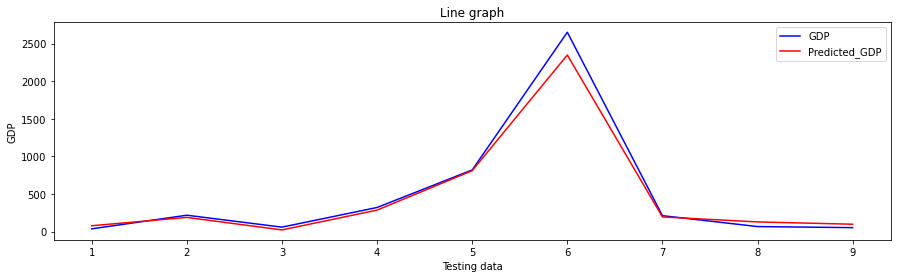

In [49]:
x= np.arange(1, 10)
y1 = y_test
y2 = GDP_Predicted
plt.figure(figsize=(15,4))
plt.title("Line graph")
plt.ylabel("GDP")
plt.xlabel("Testing data")
plt.plot(x, y1, color ="blue")
plt.plot(x, y2, color ="red")
plt.legend(["GDP","Predicted_GDP"],loc=0)
plt.show()

In [50]:
#Correlation between GDP and Predicted GDP
np.corrcoef(GDP_Predicted,y_test)

array([[1.        , 0.99868275],
       [0.99868275, 1.        ]])

In [51]:
GDP_INDIA_Clean=GDP_INDIA_clean.drop(['import', 'Inflation Rate ', 'Fertility Rate', 'Foreign investment',
       'Crop_production ', 'Net migration'],axis=1)
GDP_INDIA_Clean.columns

Index(['Year', 'Gdp', 'Predicted_GDP'], dtype='object')

In [52]:
#Inserting a column named as Residual
GDP_INDIA_Clean.insert(3,"Residual",(GDP_INDIA_clean["Gdp"])-(GDP_INDIA_clean["Predicted_GDP"]))
GDP_INDIA_Clean.head(2)

,Year,Gdp,Predicted_GDP,Residual
0,2021,3173.40,2937.122214,236.277786
3,2018,2702.93,2576.013794,126.916206


In [53]:
#Inserting a column of squared residual named as Residual_sq
GDP_INDIA_Clean.insert(4,"Residual_sq",GDP_INDIA_Clean["Residual"]*GDP_INDIA_Clean["Residual"])
GDP_INDIA_Clean.head(2)

,Year,Gdp,Predicted_GDP,Residual,Residual_sq
0,2021,3173.40,2937.122214,236.277786,55827.192346
3,2018,2702.93,2576.013794,126.916206,16107.723254


In [54]:
Predicted=GDP_INDIA_Clean.to_excel(r'E:\\Priyanka\final.xlsx',index=False)

In [55]:
Predicted=pd.read_excel("final.xlsx")

In [56]:
Predicted.head(2)

,Year,Gdp,Predicted_GDP,Residual,Residual_sq
0,2021,3173.40,2937.122214,236.277786,55827.192346
1,2018,2702.93,2576.013794,126.916206,16107.723254


In [57]:
df=pd.DataFrame([["Mean",Predicted.loc[:,"Gdp"].mean(),Predicted.loc[:,"Predicted_GDP"].mean(),Predicted.loc[:,"Residual"].mean()],
                 ["Standard Deviation",Predicted.loc[:,"Gdp"].std(),Predicted.loc[:,"Predicted_GDP"].std(),Predicted.loc[:,"Residual"].std()],
                ],columns=["","GDP","Predicted_GDP","Residual"])
df

,,GDP,Predicted_GDP,Residual
0,Mean,601.993889,600.540322,1.453567
1,Standard Deviation,786.152489,768.497928,104.593805


Hence our Multiple Linear Regression Model is good.

# 7. Verifying Assumption of Multiple Linear Regression

Assumptions are-
1. Linearity (A linear relationship between dependent and independent variables)
2. Multicollinearity (The independent variables are not highly correlated with each other)
3. Normality of residuals
4. Independence of residuals (no autocorrelation)
5. Homoskedasticity (The variance of residuals is constant)

>1. Linearity (A linear relationship between dependent and independent variables)

Text(0.5, 1, 'scatter plot')

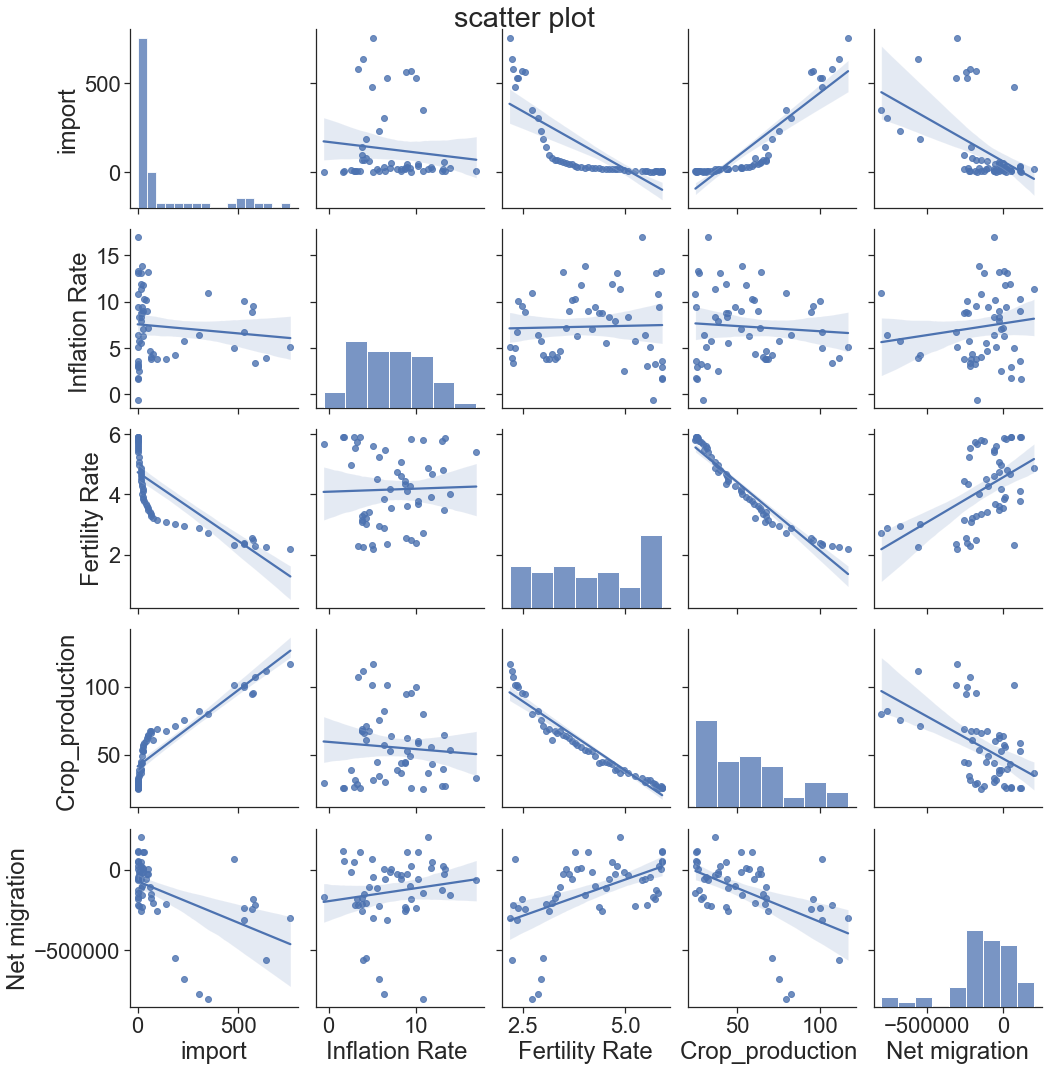

In [58]:
#Using scatter plot for determining Linearity
sns.set(style='ticks',color_codes=True,font_scale=2)
pl0t=sns.pairplot(X_FINAL,height=3,palette='Accent',diag_kind='hist',kind='reg')
pl0t.fig.suptitle('scatter plot',y=1)

>2. Multicollinearity (The independent variables are not highly correlated with each other) 

While building our model we removed all those explanatory variables which are correlated with each other using Variance inflation factor technique, so multicollinearity is absent.

>3. Normality of residuals

Text(0.5, 1.0, 'Distribution of Residual')

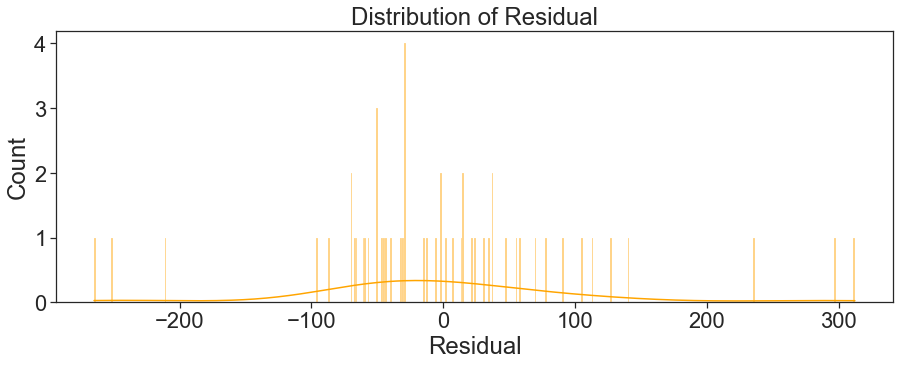

In [59]:
#Using Histogram plot
plt.figure(figsize=(15,5))
sns.histplot(data=Predicted,x="Residual",bins=442,kde=True,color="orange")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Distribution of Residual")

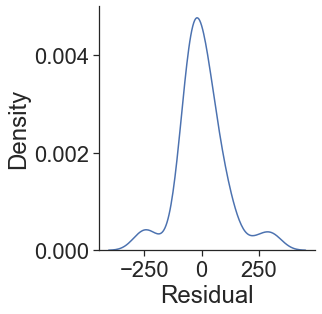

In [60]:
sns.displot(Predicted.Residual,kind="kde")

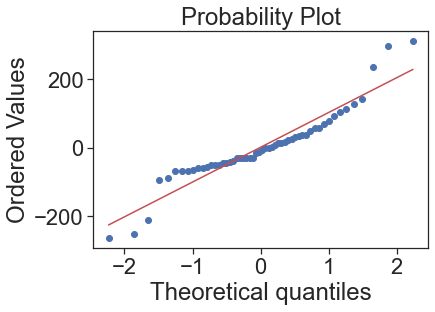

In [61]:
#Using QQ-plot
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(Predicted.Residual,plot=ax,fit=True)
plt.show()

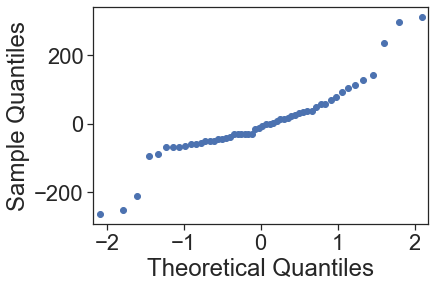

In [62]:
#Using QQ-Plot
fig=sm.qqplot(Predicted.Residual)
plt.show()

> Applying Shapiro wilk test to check Normality of Residuals

In [63]:
#Null hypothesis that Residual follow normal distribution
shapiro(Predicted.Residual)

ShapiroResult(statistic=0.9107780456542969, pvalue=0.0006808167672716081)

In [64]:
0.0006808167672716081<0.05

True

Since p-value is less than 0.05, we reject null hypothesis of Shapiro_wilk test.
This mean we have sufficient evidence to say that residual term does not follow normal distribution

> 4. Independence of residuals (no autocorrelation) 

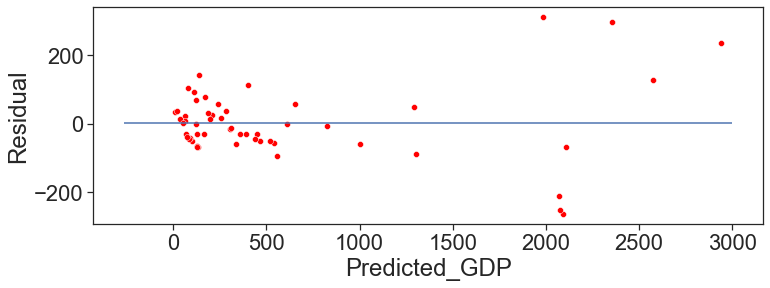

In [65]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=Predicted.Predicted_GDP,y=Predicted.Residual,color="red" )
plt.hlines(Predicted.loc[:,"Residual"].mean(),Predicted.loc[:,"Residual"].min(),3000)

>Applying Dubin_Watson Test

Durbin_Watson Test is a test statistic used to detect the presence of autocorrelation at lag 1 in the residuals from a regressive analysis.

Text(0.5, 0, 'Observation')

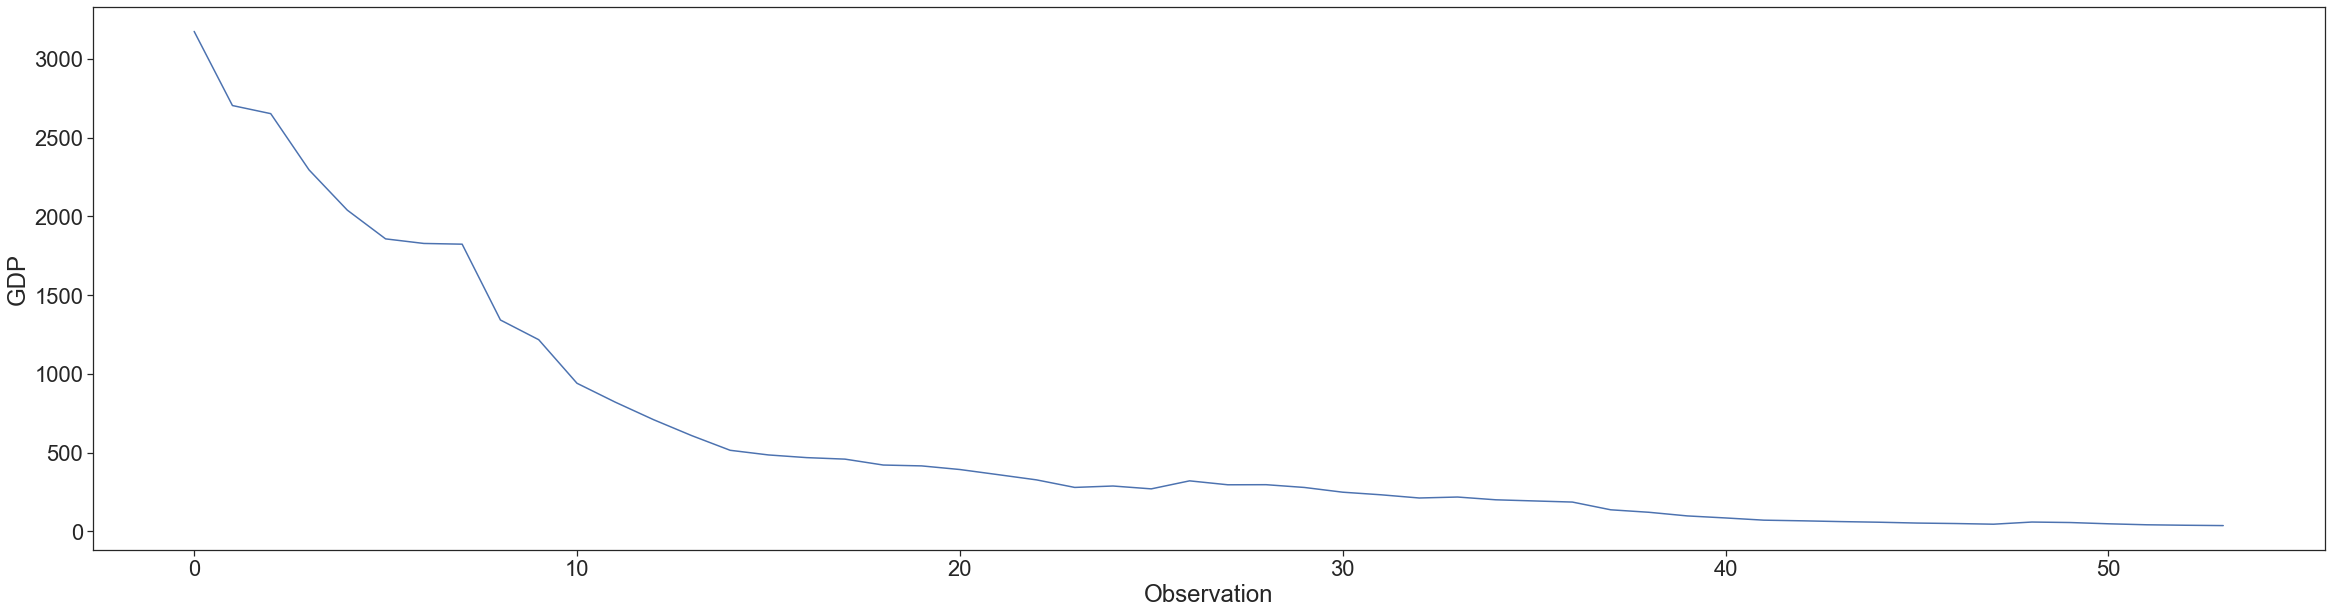

In [66]:
# Checking Whether our GDP Time series data is Stationary or not
plt.figure(figsize=(40,10))
Predicted["Gdp"].plot()
plt.ylabel("GDP")
plt.xlabel("Observation")

From the above plot its hard to tell whether GDP posseses Stationary Time series or not, so applying Dickey-Fuller test stationarity of time series.

In [67]:
#Null hypo that the time series data is non stationary
#Alter hypo that is stationary
#Assume alpha=0.05, meaning 95% confidence. The test are interepted with p-value if p>0.05 reject null
dftest=adfuller(Predicted['Gdp'],autolag='AIC')
print("1. ADF :",dftest[0])
print("2. P-Value :",dftest[1])
print("3. critical values :")
for key, val in dftest[4].items():
    print("\t",key,":",val)

1. ADF : -5.080102621965528
2. P-Value : 1.536966440857536e-05
3. critical values :
	 1% : -3.5656240522121956
	 5% : -2.920142229157715
	 10% : -2.598014675124952


As p-value is greater than critical values hence we cannot reject null hypothesis, Hence the GDP over Time is Non Stationary Time Series.

A Autoregressive model can be both stationary as well as non stationary where as finite Moviang Average model is always Stationary.
So it is quite obvious that we can only fit AR model for this GDP Data.
The AR part involves regressing the variable on its own lagged (i.e., past) values. The MA part involves modeling the error term as a linear combination of error terms occurring contemporaneously and at various times in the past.

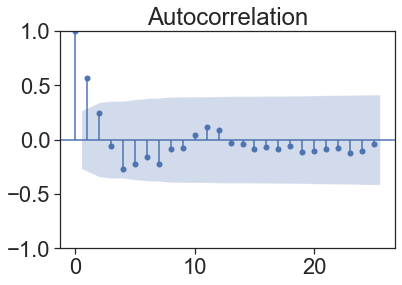

In [68]:
acf=plot_acf(Predicted["Residual"],lags=25)

From above Partial Autocorrelation plot we can say that this might follow an AR(1) model, hence can't be sure about using Durbin_Watson test.

> Applying Breusch_Godfrey Test for testing Autocorrelation

In [69]:
GDP_INDIA_Clean=X
GDP_INDIA_Clean_smt=smt.add_constant(GDP_INDIA_Clean)

In [70]:
import statsmodels.regression.linear_model as rg
ivar=['const', 'Per Capita ', 'export', 'import', 'Consumption expenditure ',
       'Inflation Rate ', 'Manufacturing Output', 'Population',
       'Life Expectancy ', 'Fertility Rate',
       'Crop_production ', 'Net migration', 'India Consumer Spending ']
reg=rg.OLS(GDP_INDIA_clean['Gdp'],GDP_INDIA_Clean_smt[ivar],hasconst=bool).fit()

In [71]:
#Null hypothesis that no Autocorrelation
for i in [1,2,3,4,5]:
    print(i)
    print("Breusch_Godfrey LM Test Statistic:",np.round(smd.acorr_breusch_godfrey(reg, nlags=i)[0], 6))
    print("Breusch_Godfrey LM Test P_Value:",np.round(smd.acorr_breusch_godfrey(reg, nlags=i)[1], 6))

1
Breusch_Godfrey LM Test Statistic: 2.396188
Breusch_Godfrey LM Test P_Value: 0.121631
2
Breusch_Godfrey LM Test Statistic: 3.576513
Breusch_Godfrey LM Test P_Value: 0.167252
3
Breusch_Godfrey LM Test Statistic: 4.58315
Breusch_Godfrey LM Test P_Value: 0.204992
4
Breusch_Godfrey LM Test Statistic: 7.154267
Breusch_Godfrey LM Test P_Value: 0.127957
5
Breusch_Godfrey LM Test Statistic: 8.1296
Breusch_Godfrey LM Test P_Value: 0.149236


For different lags the Breusch_Godfrey Statistic is greater than P_value hence we can say that Autocorrelation is present.

>5. Homoskedasticity (The variance of residuals is constant) 

<AxesSubplot:xlabel='Predicted_GDP', ylabel='Residual_sq'>

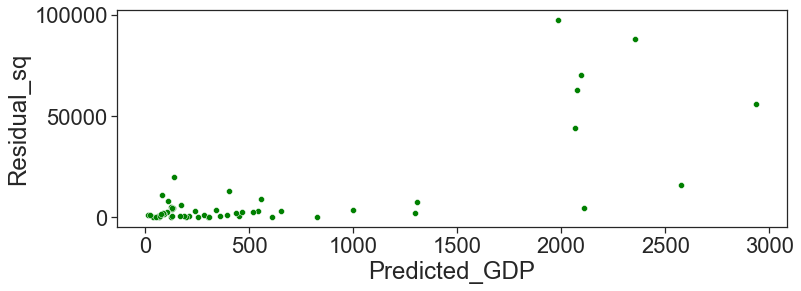

In [72]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=Predicted.Predicted_GDP,y=Predicted.Residual_sq,color="green" )

> Golgfeld-Quandt test to check Homoscedasticity of Residuals

Null hypothesis: There is no heteroscedasticity i.e, homoscedasticity

Alternat hypothesis: Heteroscedasticity

In [73]:
#Sorting residuals in ascending order
sorted_GDP=Predicted.sort_values('Gdp',ascending=True)
sorted_GDP

,Year,Gdp,Predicted_GDP,Residual,Residual_sq
53,1960,37.03,76.832399,-39.802399,1584.230976
52,1961,39.23,84.905696,-45.675696,2086.269231
51,1962,42.16,70.915236,-28.755236,826.863611
47,1966,45.87,11.656408,34.213592,1170.569875
50,1963,48.42,91.537369,-43.117369,1859.107516
46,1967,50.13,36.437779,13.692221,187.476924
45,1968,53.09,103.503230,-50.413230,2541.493771
49,1964,56.48,53.943491,2.536509,6.433878
44,1969,58.45,127.493373,-69.043373,4766.987322
48,1965,59.55,22.241730,37.308270,1391.907013


In [74]:
#N=54,C=4,K=7
#SR1=sorted residual 1
SR1=sorted_GDP["Residual_sq"].iloc[:25]
#RSS1 is residual sum of square for first sorted residuals
RSS1=SR1.sum()
#SR2=sorted residual 2
SR2=sorted_GDP["Residual_sq"].iloc[29:54]
#RSS2 is residual sum of square for second sorted residuals
RSS2=SR2.sum()
RSS1,RSS2

(59860.152913731064, 496324.79363763914)

Degree of freedom for both residual sum of square is (N-C-2K)/2=18

In [75]:
#F calculated
F_cal=RSS2/RSS1
F_cal

8.291405375340918

F_critical(18,18) at Probability level of 0.05=2.217

F_cal greater than F_critical at choosen level of significance so our null hypothesis is rejected hence presence of heteroscedasticity.

# 8. Prediction

In [76]:
Import=float(input("Entre the value of good or service bought in a country that was produced in another country (Billion US $)"))
Inflation_Rate=float(input("Enter the Inflation rate of that year"))
Fertility_Rate=float(input("Enter the average number of children that would be born to a woman over her lifetime"))
Crop_production=float(input("Enter the crops produced for domestic and commercial purposes in that perticular year(index (2014-2016 = 100))"))
Net_migration=float(input("Enter the net total of migrants during the period, that is, the number of immigrants minus the number of emigrants"))

Predicted_GDP=-1836.5613 + 2.2539*Import -4.4255*Inflation_Rate + 231.6398*Fertility_Rate + 22.0009*Crop_production - 0.00001372*Net_migration
Predicted_GDP

Entre the value of good or service bought in a country that was produced in another country (Billion US $)500
Enter the Inflation rate of that year6
Enter the average number of children that would be born to a woman over her lifetime2.3
Enter the crops produced for domestic and commercial purposes in that perticular year(index (2014-2016 = 100))115
Enter the net total of migrants during the period, that is, the number of immigrants minus the number of emigrants12365


2326.5410922

# 9.  Select ARIMA Model for Time Series Using Box-Jenkins Methodology

Box-Jenkins Methodology

The Box-Jenkins methodology is a five-step process for identifying, selecting, and assessing conditional mean models (for discrete, univariate time series data).

1. Determine whether the time series is stationarity. If the series is not stationary, successively difference it to attain stationarity. The sample autocorrelation function (ACF) and partial autocorrelation function (PACF) of a stationary series decay exponentially (or cut off completely after a few lags).

2. Identify a stationary conditional mean model for the series. The sample ACF and PACF functions can help with this selection. For an autoregressive (AR) process, the sample ACF decays gradually, but the sample PACF cuts off after a few lags. Conversely, for a moving average (MA) process, the sample ACF cuts off after a few lags, but the sample PACF decays gradually. If both the ACF and PACF decay gradually, consider an ARMA model.

3. Create a model template for estimation, and then fit the model to the series. When fitting nonstationary models in Econometrics Toolbox™, you do not need to manually difference the series and fit a stationary model. Instead, you can use the series on the original scale, and create an arima model object with the desired degree of nonseasonal and seasonal differencing. Fitting an ARIMA model directly is advantageous for forecasting: forecasts are returned on the original scale (not differenced).

4. Conduct goodness-of-fit checks to ensure the model describes the series adequately. Residuals should be uncorrelated, homoscedastic, and normally distributed with constant mean and variance. If the residuals are not normally distributed, you can change the innovation distribution to a Student’s t.

5. After choosing a model—and checking its fit and forecasting ability—you can use the model to forecast or generate Monte Carlo simulations over a future time horizon.

# 9. 1. Checking Whether our GDP Time series data is Stationary or not

Text(0.5, 0, 'Observation')

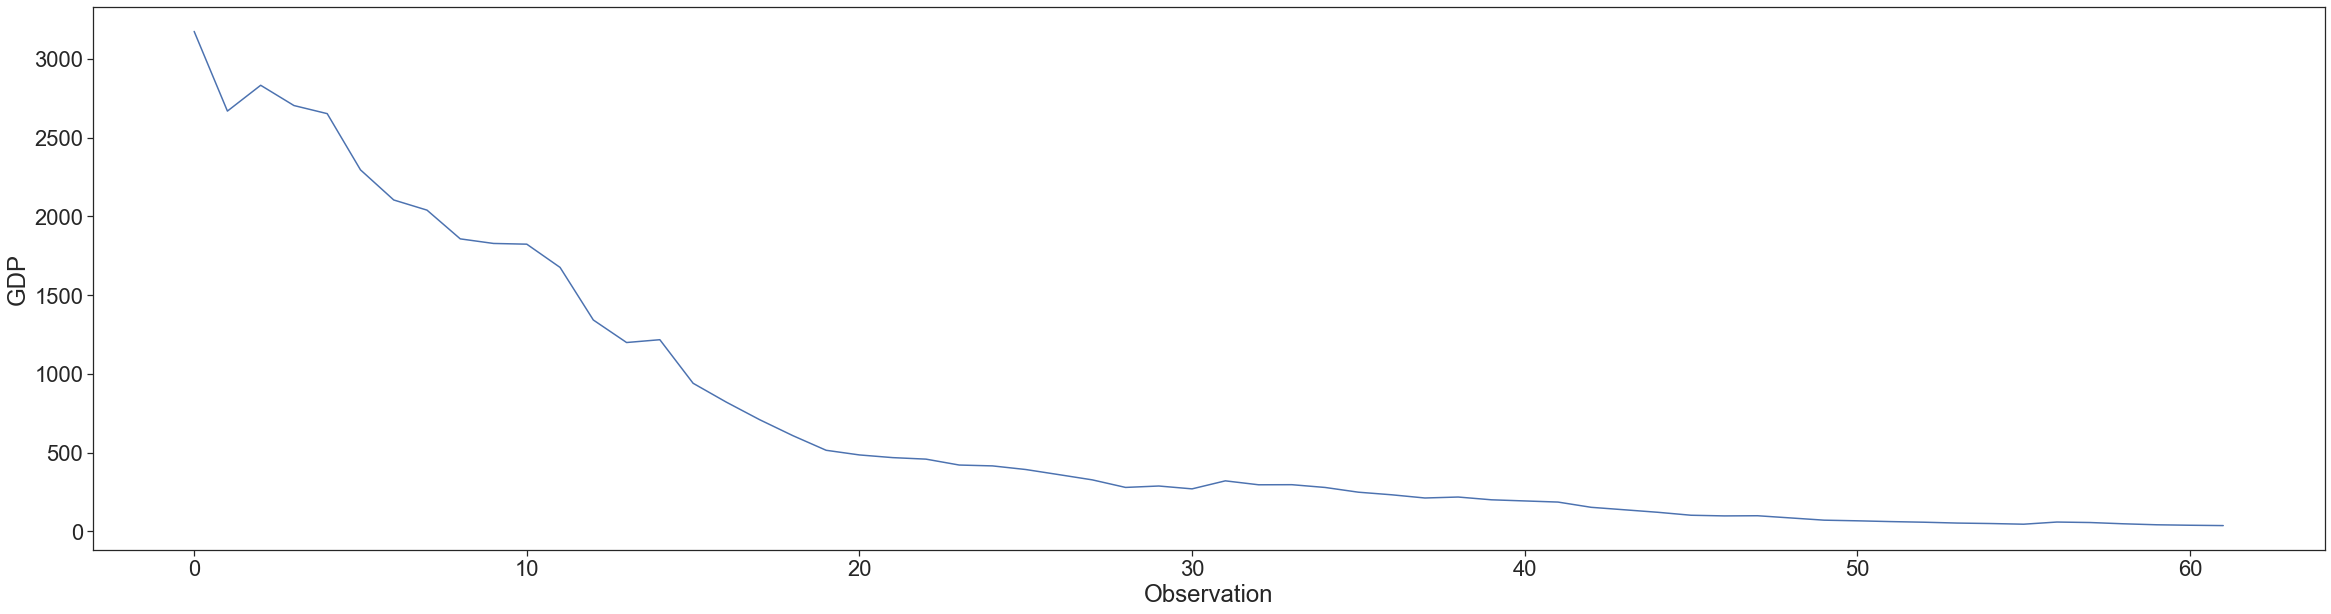

In [77]:
#Visualization method
plt.figure(figsize=(40,10))
GDP["Gdp"].plot()
plt.ylabel("GDP")
plt.xlabel("Observation")

> Using Rolling Method to check Stationarity of Time Series Model

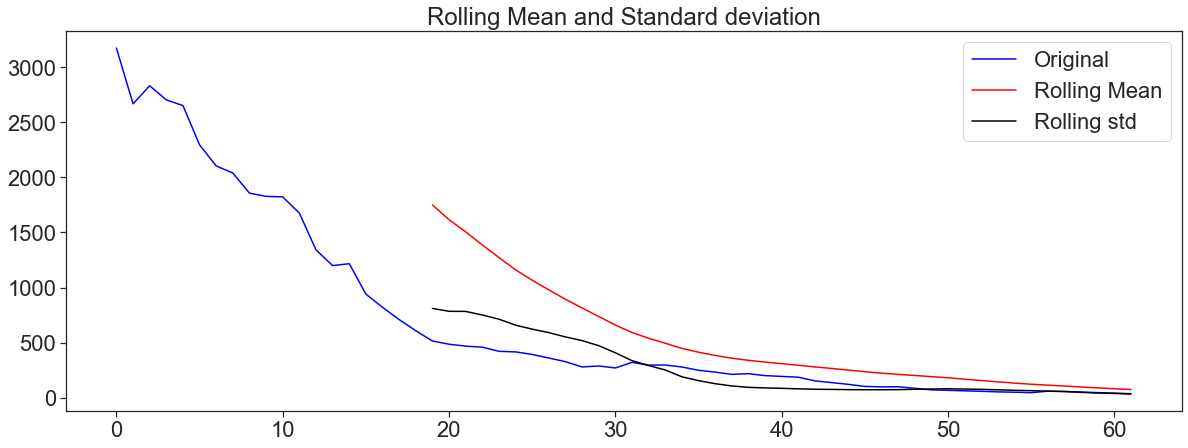

In [78]:
rollmean=GDP['Gdp'].rolling(20).mean()
rollstd=GDP['Gdp'].rolling(20).std()
plt.figure(figsize=(20,7))
fig=plt.figure(1)
original=plt.plot(GDP['Gdp'],color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation')
plt.show()

From above plot we can say that this Time Series don't have constant mean and variance hence look like non-Stationary time series.

> Checking for possible components of time series

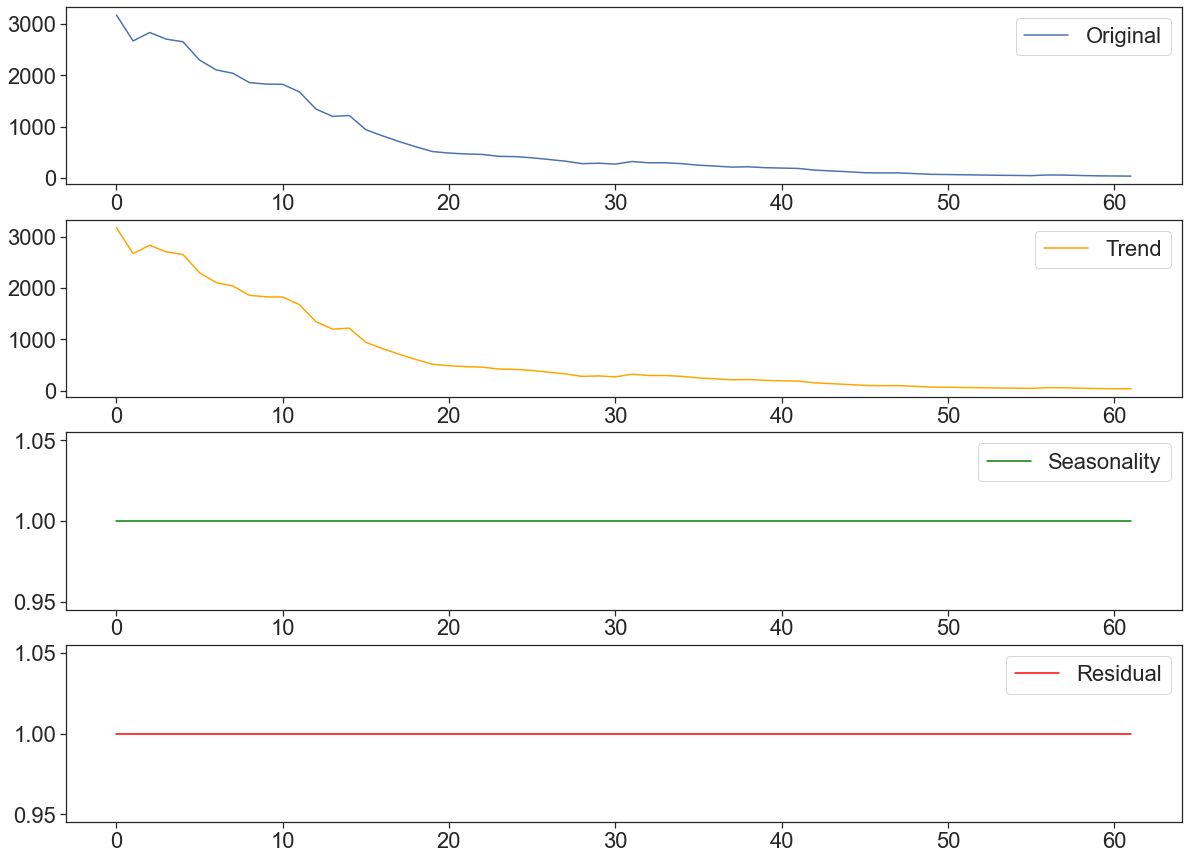

In [79]:
dec=seasonal_decompose(GDP.Gdp,period=1,model='multiplicative')
trend=dec.trend
seasonal=dec.seasonal
residual=dec.resid
plt.figure(figsize=(20,15))
fig=plt.figure(1)
plt.subplot(411)
plt.plot(GDP['Gdp'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend',color='orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual',color='red')
plt.legend(loc='best')
plt.show()

Hence GDP is a Non Stationary Time series with trend component.

ARIMA models are applied in some cases where data show evidence of non-stationarity.

Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

Integrated (I): represents the differencing of raw observations to allow the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

p: the number of lag observations in the model, also known as the lag order.
   
   d: the number of times the raw observations are differenced; also known as the degree of differencing.
   
   q: the size of the moving average window, also known as the order of the moving average.




> Checking Stationarity of Time Series model by Argumented Dickey Fuller Test

In [80]:
#Null hypo that the time series data is non stationary
#Alter hypo that is stationary
#Assume alpha=0.05, meaning 95% confidence. The test are interepted with p-value if p>0.05 reject null
dftest=adfuller(GDP.Gdp,autolag='AIC')
print("1. ADF :",dftest[0])
print("2. P-Value :",dftest[1])
print("3. critical values :")
for key, val in dftest[4].items():
    print("\t",key,":",val)

1. ADF : -3.8242187276627604
2. P-Value : 0.0026690216243612603
3. critical values :
	 1% : -3.562878534649522
	 5% : -2.918973284023669
	 10% : -2.597393446745562


P_value greater than critical value so null hypothesis is rejected hence Time series is Stationary.

# 9.2. Figuring out order for ARIMA model

C:\Users\Ankur\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


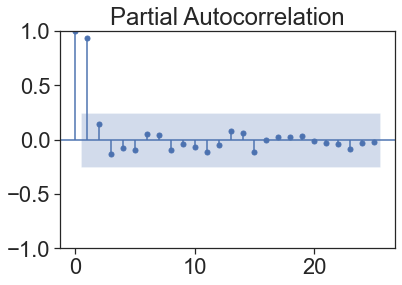

In [81]:
pacf=plot_pacf(GDP.Gdp,lags=25)

From the Partial Autocorrelation plot we can say the MA(1) might fit, hence p might equal to 1

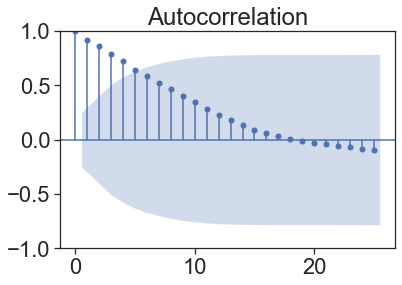

In [82]:
acf=plot_acf(GDP.Gdp,lags=25)

From Autocorrelation plot we can say AR with lag=5 might fit

> Checking for best (p,d,q) for our model 

In [83]:
!pip install pmdarima

In [84]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,start_p=1,start_q=1,max_p=10,max_q=10,test='adf',seasonal=True,trace=True)
    return automodel
arimamodel(GDP['Gdp'])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=774.035, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1017.838, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1047.275, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=772.202, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=767.567, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=776.766, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=756.541, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=764.127, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=778.766, Time=0.09 sec
 ARI

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

So our Time Series model will follow ARIMA(3,0,1)

In [85]:
#split data into train and test
from statsmodels.tsa.arima_model import ARIMA
print(GDP.shape)
train=GDP.iloc[:45]
test=GDP.iloc[45:62]
print(train.shape,test.shape)

(62, 17)
(45, 17) (17, 17)


# 9.3 Create a model template

In [86]:
ARIMA_model=sm.tsa.arima.ARIMA(GDP['Gdp'],order=(3,0,1))
Prediction_ARIMA=ARIMA_model.fit()
Prediction_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Gdp   No. Observations:                   62
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -370.693
Date:                Wed, 05 Apr 2023   AIC                            753.387
Time:                        23:31:03   BIC                            766.150
Sample:                             0   HQIC                           758.398
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        699.1236   2201.027      0.318      0.751   -3614.810    5013.057
ar.L1          1.6107      0.108     14.952      0.000       1.400       1.822
ar.L2         -0.2476      0.203     -1.219      0.223      -0.646       0.150
ar.L3         -0.3650      0.099     -3.688      0.000      -0.559      -0.171
ma.L1         -0.7872      0.131     -5.998      0.000      -1.044      -0.530
sigma2      8062.0906   1276.862      6.314      0.000    5559.488    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               121.03
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
AR_model=sm.tsa.arima.ARIMA(GDP['Gdp'],order=(5,0,0))
Prediction_AR=AR_model.fit()
Prediction_AR.summary()

C:\Users\Ankur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Gdp   No. Observations:                   62
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -369.205
Date:                Wed, 05 Apr 2023   AIC                            752.409
Time:                        23:31:05   BIC                            767.299
Sample:                             0   HQIC                           758.256
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        699.1071   2586.019      0.270      0.787   -4369.398    5767.612
ar.L1          0.9226      0.102      9.070      0.000       0.723       1.122
ar.L2          0.3199      0.116      2.766      0.006       0.093       0.547
ar.L3         -0.1658      0.120     -1.386      0.166      -0.400       0.069
ar.L4          0.4794      0.141      3.401      0.001       0.203       0.756
ar.L5         -0.5632      0.067     -8.352      0.000      -0.695      -0.431
sigma2      7620.3818   1047.878      7.272      0.000    5566.578    9674.185
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):                54.94
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
MA_model=sm.tsa.arima.ARIMA(GDP['Gdp'],order=(0,0,1))
Prediction_MA=MA_model.fit()
Prediction_MA.summary()

C:\Users\Ankur\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Gdp   No. Observations:                   62
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -470.760
Date:                Wed, 05 Apr 2023   AIC                            947.521
Time:                        23:31:06   BIC                            953.902
Sample:                             0   HQIC                           950.026
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        719.2820    218.106      3.298      0.001     291.802    1146.762
ma.L1          0.9998      0.240      4.163      0.000       0.529       1.471
sigma2      2.151e+05      0.001   2.03e+08      0.000    2.15e+05    2.15e+05
===================================================================================
Ljung-Box (L1) (Q):                  29.24   Jarque-Bera (JB):                62.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.13e+26. Standard errors may be unstable.
"""

The Akaike information criterion (AIC) and the Bayesian information criterion (BIC) provide measures of model performance that account for model complexity. AIC and BIC combine a term reflecting how well the model fits the data with a term that penalizes the model in proportion to its number of parameters.
AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, whereas BIC is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup.

The less the value of AIC and BIC better the model.

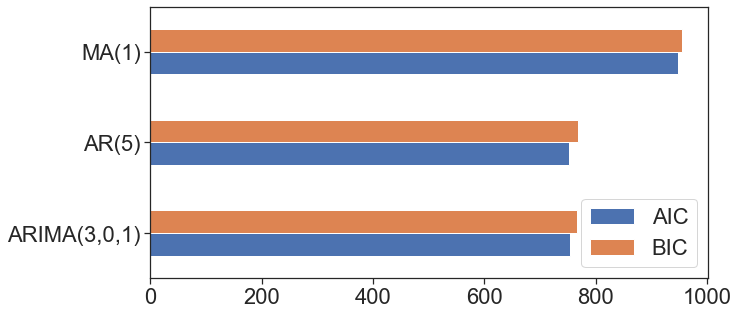

In [89]:
AIC=[753.387,752.409,947.521]
BIC=[766.150,767.299,953.902]
index=["ARIMA(3,0,1)","AR(5)","MA(1)"]
df=pd.DataFrame({'AIC':AIC,'BIC':BIC},index=index)
ax=df.plot.barh(figsize=(10,5))

So we are choosing AR(5) model and model is given by

Xt=0.9226X(t-1)+0.3199X(t-2)-0.1658X(t-3)+0.4794X(t-4)-0.5632X(t-5) +et

In [90]:
#Inserting a column of Predicted_GDP
#In excel sheet

In [91]:
df = pd.read_excel('gdp.xlsx', sheet_name=1)
df.head(7)

,Year,Gdp,Predicted_Gdp,Residual
0,2021,3173.40,2897.561203,275.838797
1,2020,2667.69,2952.826843,-285.136843
2,2019,2831.55,2821.473661,10.076339
3,2018,2702.93,2763.431738,-60.501738
4,2017,2651.47,2312.817887,338.652113
5,2016,2294.80,2134.674501,160.125499
6,2015,2103.59,2102.504340,1.085660


> Visualization of Actual and Predicted GDP through AR(3) model

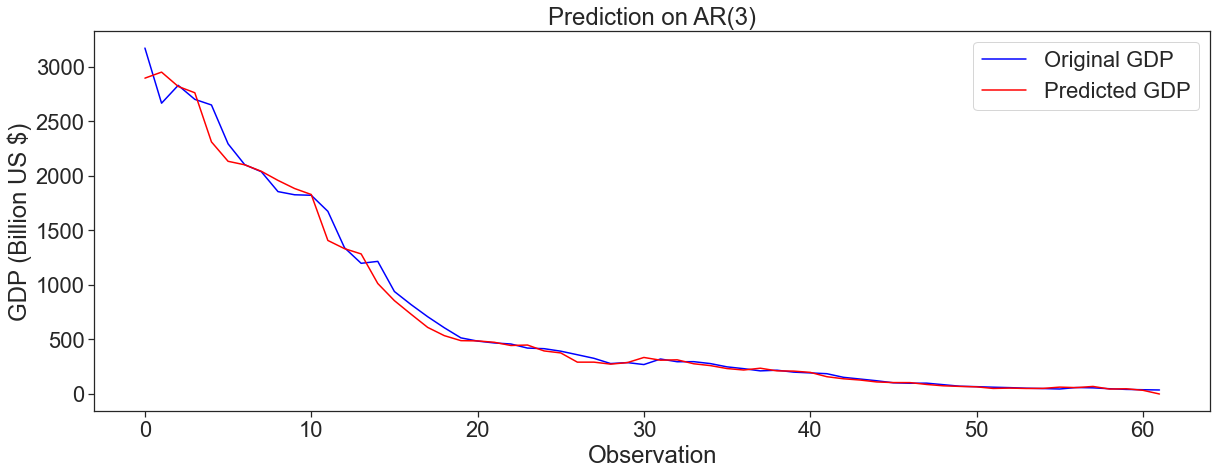

In [92]:
fig=plt.figure(figsize=(20,7))
original=plt.plot(df['Gdp'],color='blue',label='Original GDP')
predicted=plt.plot(df['Predicted_Gdp'],color='red',label='Predicted GDP')
plt.xlabel('Observation')
plt.ylabel('GDP (Billion US $)')
plt.legend(loc='best')
plt.title('Prediction on AR(3)')
plt.show()

Text(0, 0.5, 'Residuals')

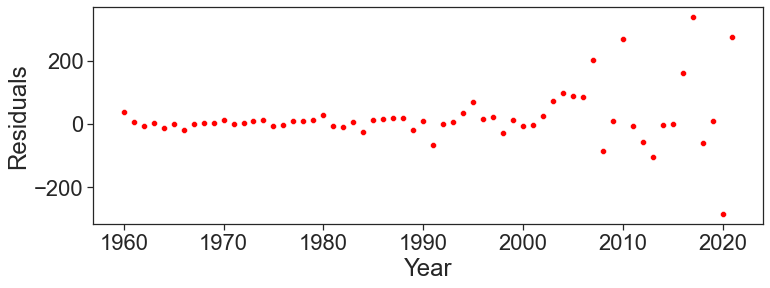

In [93]:
Residual=df['Residual']
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=df['Year'],y=Residual,color="red" )
plt.ylabel("Residuals")

# 10. Prediction  using AR(3) model

In [94]:
X_t1 =float(input("Enter the GDP of previous year (US billion dollars)"))
X_t2 =float(input("Enter the GDP of 2nd Previous year (US billion dollars)"))
X_t3 =float(input("Enter the GDP of 3rd Previous year (US billion dollars)"))
X_t4 =float(input("Enter the GDP of 4th Previous year (US billion dollars)"))
X_t5 =float(input("Enter the GDP of 5th Previous year (US billion dollars)"))
Predicted_GDP=0.9226*X_t1 + 0.3199*X_t2 - 0.1658*X_t3 + 0.4794*X_t4 - 0.5632*X_t5
Predicted_GDP

Enter the GDP of previous year (US billion dollars)2356
Enter the GDP of 2nd Previous year (US billion dollars)2351
Enter the GDP of 3rd Previous year (US billion dollars)1976
Enter the GDP of 4th Previous year (US billion dollars)1726
Enter the GDP of 5th Previous year (US billion dollars)1332


2675.3716999999992

# 11. Conclusion

1.The formed Multiple Linear Regression Model is given by  GDP= -1836.5613 + 2.2539*Import -4.4255*Inflation_Rate + 231.6398*Fertility_Rate + 22.0009*Crop_production - 0.00001372*Net_migration

2.The above model have R square value of 0.982 and Adjusted R square value as 0.98

3.The Residuals of Multiple Linear Regression Model does not follow the assumption of normality

4.The Residuals of Multiple Linear Regression Model aur correlated, hence Autocorrelation Present

5.The Residuals of Multiple Linear Regression Model does not have constant Variance throughtout, hence Heteroscedasticity most likely present

6.The Time Series(GDP) Model is Stationary

7.The Time Series is following AR(3) model
